In [1]:
from fast_tools import get_all_tapes
import numpy as np
import matplotlib.pyplot as plt

tapes = get_all_tapes()

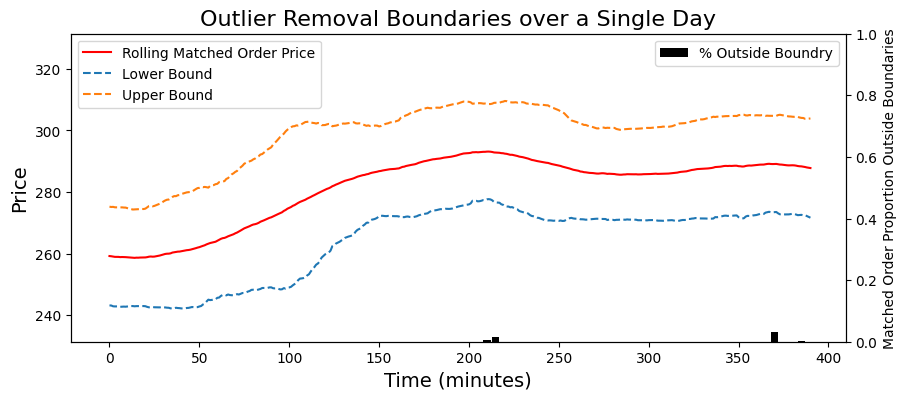

In [22]:
data = tapes[0]

# look at 60 minutes data, 1 second steps

dt = 60*60 # in seconds
stds = []
means = []
w_bids = []
w_asks = []

t_start = 0
start_time = 0
end_index = len(data)
z = 1.96 # 1.96 is 95% of the data
z = 2.807 # 99%
z = 3.29 # 99.9%

outside = []
while True:
    end_time = start_time + dt
    t_end = t_start
    rolling_data = []
    while data[t_end, 0] < end_time:
        rolling_data += [data[t_end, 1]] * int(data[t_end,2])
        t_end += 1

    mean = np.mean(rolling_data)
    std = np.std(rolling_data)
    means.append(mean)

    w_bid = mean - std * z
    w_ask = mean + std * z
    w_bids.append(w_bid)
    w_asks.append(w_ask)

    # look one minute a head
    local_end = t_end
    future_data = []
    while data[local_end, 0] < end_time + 60:
        future_data += [data[local_end, 1]] * int(data[local_end,2])
        local_end += 1

    future_data = np.array(future_data)

    n_above = len(np.where(future_data > w_ask)[0])
    n_below = len(np.where(future_data < w_bid)[0])
    outside.append((n_above + n_below) / len(future_data))
    #plt.title(f"Above:{len(np.where(future_data > w_ask)[0])},Below:{len(np.where(future_data < w_bid)[0])},total:{len(future_data)}")
    #plt.hist(future_data, bins = 40)
    #plt.axvline(w_ask)
    #plt.axvline(w_bid)
    #plt.show()

    start_time += 60
    while data[t_start, 0] < start_time:
        t_start += 1

    end_time += dt
    if end_time >= 8.5*60*60:
        break

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))

# Plot means
plt.plot(means, 'r', label='Rolling Matched Order Price')
plt.plot(w_bids, label='Lower Bound', linestyle = "--")
plt.plot(w_asks, label='Upper Bound', linestyle = "--")

# Adjust y-axis limits for means
plt.ylim(np.mean(means) - 50, np.mean(means) + 50)

# Title and labels for the first y-axis
plt.title('Outlier Removal Boundaries over a Single Day', fontsize = 16)
plt.xlabel('Time (minutes)', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
# Show legend
plt.legend(loc = "upper left")

# Create a second y-axis for 'outside'
plt.twinx()
aggregated_values = np.mean(np.array(outside[:-1]).reshape(-1, 5), axis=1)

# Create x-axis for the original time scale
original_timescale = np.arange(0, len(outside), 5)

# Plotting the bar chart
plt.bar(original_timescale[:-1], aggregated_values, width=4, color = 'black', label='% Outside Boundry')  # Adjust width for visual clarity

plt.ylim(0, 1)
plt.legend(loc = "upper right")
# Label for the second y-axis
plt.ylabel('Matched Order Proportion Outside Boundaries')

# Show the plot
plt.show()

